# Problem Statement

Global Mart is an online supergiant store that has worldwide operations. This store takes orders and delivers across the globe and deals with all the major product categories — consumer, corporate & home office.

As a sales manager for this store, we have to forecast the sales of the products for the next 6 months, so that we have a proper estimate and can plan the inventory and business processes accordingly.

# Initial Setup

### Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import variation 

import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [2]:
data = pd.read_csv('Global+Superstore+Data.csv')
data.head(10)

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200
5,28-06-2013,Corporate,APAC,2862.675,763.2750
6,07-11-2011,Consumer,APAC,1822.080,564.8400
7,14-04-2012,Consumer,APAC,5244.840,996.4800
8,14-10-2014,Corporate,US,5083.960,1906.4850
9,28-01-2012,Consumer,US,4297.644,-1862.3124


# Data Inspection

In [3]:
data.shape

(51290, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [5]:
data.isnull().sum()

Order Date    0
Segment       0
Market        0
Sales         0
Profit        0
dtype: int64

> No null values are found in the dataset

# Finding out the 21 Market-Segments

### Creating the Column - 'Market-Segment'

First, creating a new column 'Market-Segment' by combining the two columns 'Market' and 'Segment' with '-' as a separator.

In [6]:
separator = '-'
data["Market-Segment"] = data["Market"].map(str) + separator + data["Segment"]

In [7]:
data.head(10)

,Order Date,Segment,Market,Sales,Profit,Market-Segment
0,31-07-2012,Consumer,US,2309.650,762.1845,US-Consumer
1,05-02-2013,Corporate,APAC,3709.395,-288.7650,APAC-Corporate
2,17-10-2013,Consumer,APAC,5175.171,919.9710,APAC-Consumer
3,28-01-2013,Home Office,EU,2892.510,-96.5400,EU-Home Office
4,05-11-2013,Consumer,Africa,2832.960,311.5200,Africa-Consumer
5,28-06-2013,Corporate,APAC,2862.675,763.2750,APAC-Corporate
6,07-11-2011,Consumer,APAC,1822.080,564.8400,APAC-Consumer
7,14-04-2012,Consumer,APAC,5244.840,996.4800,APAC-Consumer
8,14-10-2014,Corporate,US,5083.960,1906.4850,US-Corporate
9,28-01-2012,Consumer,US,4297.644,-1862.3124,US-Consumer


In [8]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [9]:
data.head(10)

,Order Date,Segment,Market,Sales,Profit,Market-Segment
0,2012-07-31,Consumer,US,2309.650,762.1845,US-Consumer
1,2013-05-02,Corporate,APAC,3709.395,-288.7650,APAC-Corporate
2,2013-10-17,Consumer,APAC,5175.171,919.9710,APAC-Consumer
3,2013-01-28,Home Office,EU,2892.510,-96.5400,EU-Home Office
4,2013-05-11,Consumer,Africa,2832.960,311.5200,Africa-Consumer
5,2013-06-28,Corporate,APAC,2862.675,763.2750,APAC-Corporate
6,2011-07-11,Consumer,APAC,1822.080,564.8400,APAC-Consumer
7,2012-04-14,Consumer,APAC,5244.840,996.4800,APAC-Consumer
8,2014-10-14,Corporate,US,5083.960,1906.4850,US-Corporate
9,2012-01-28,Consumer,US,4297.644,-1862.3124,US-Consumer


In [10]:
data = data.sort_values(by='Order Date')

In [11]:
data.head(10)

,Order Date,Segment,Market,Sales,Profit,Market-Segment
42055,2011-01-01,Consumer,APAC,55.242,15.3420,APAC-Consumer
25084,2011-01-01,Consumer,EMEA,66.120,29.6400,EMEA-Consumer
31869,2011-01-01,Consumer,APAC,113.670,37.7700,APAC-Consumer
22951,2011-01-01,Consumer,APAC,120.366,36.0360,APAC-Consumer
31579,2011-01-01,Home Office,EU,44.865,-26.0550,EU-Home Office
9352,2011-01-01,Consumer,Africa,408.300,106.1400,Africa-Consumer
6200,2011-01-02,Consumer,US,290.666,3.4196,US-Consumer
15262,2011-01-02,Corporate,EU,139.650,15.3000,EU-Corporate
47497,2011-01-02,Corporate,LATAM,9.576,-0.9840,LATAM-Corporate
28495,2011-01-02,Corporate,LATAM,81.984,-19.1360,LATAM-Corporate


### Checking the number of Market Segments

In [12]:
data['Market-Segment'].nunique()

21

In [13]:
# Checking the list of Market Segments
data['Market-Segment'].value_counts()

APAC-Consumer         5699
LATAM-Consumer        5321
US-Consumer           5191
EU-Consumer           5186
APAC-Corporate        3283
EU-Corporate          3077
LATAM-Corporate       3053
US-Corporate          3020
EMEA-Consumer         2538
Africa-Consumer       2381
APAC-Home Office      2020
LATAM-Home Office     1920
US-Home Office        1783
EU-Home Office        1737
EMEA-Corporate        1574
Africa-Corporate      1312
EMEA-Home Office       917
Africa-Home Office     894
Canada-Consumer        202
Canada-Corporate       110
Canada-Home Office      72
Name: Market-Segment, dtype: int64

We can see that there are 21 Market Segments which are:
1. APAC-Consumer      
3. LATAM-Consumer        
4. US-Consumer           
5. EU-Consumer           
6. APAC-Corporate        
7. EU-Corporate          
8. LATAM-Corporate       
9. US-Corporate          
10. EMEA-Consumer         
11. Africa-Consumer       
12. APAC-Home Office      
13. LATAM-Home Office     
14. US-Home Office        
15. EU-Home Office        
16. EMEA-Corporate        
17. Africa-Corporate      
18. EMEA-Home Office       
19. Africa-Home Office     
20. Canada-Consumer        
21. Canada-Corporate       
22. Canada-Home Office      

# Data Preparation

### Dropping unnecessary columns

In [14]:
data = data.drop(['Market','Segment'], axis=1)
data.head()

,Order Date,Sales,Profit,Market-Segment
42055,2011-01-01,55.242,15.342,APAC-Consumer
25084,2011-01-01,66.120,29.640,EMEA-Consumer
31869,2011-01-01,113.670,37.770,APAC-Consumer
22951,2011-01-01,120.366,36.036,APAC-Consumer
31579,2011-01-01,44.865,-26.055,EU-Home Office


### Converting 'Order-Date' to the required Month-Year Format

In [15]:
data['Order Date'] = pd.to_datetime(data['Order Date']).dt.to_period('m')

In [16]:
data.head(10)

,Order Date,Sales,Profit,Market-Segment
42055,2011-01,55.242,15.3420,APAC-Consumer
25084,2011-01,66.120,29.6400,EMEA-Consumer
31869,2011-01,113.670,37.7700,APAC-Consumer
22951,2011-01,120.366,36.0360,APAC-Consumer
31579,2011-01,44.865,-26.0550,EU-Home Office
9352,2011-01,408.300,106.1400,Africa-Consumer
6200,2011-01,290.666,3.4196,US-Consumer
15262,2011-01,139.650,15.3000,EU-Corporate
47497,2011-01,9.576,-0.9840,LATAM-Corporate
28495,2011-01,81.984,-19.1360,LATAM-Corporate


### Calculating Monthly Profit Data for each Market Segment
We need to sum the profit month-wise for each Market Segment by using Pivot Table.

In [17]:
# Creating a duplicate dataset of the orginal data.
df = data.copy()

In [18]:
df.head(10)

,Order Date,Sales,Profit,Market-Segment
42055,2011-01,55.242,15.3420,APAC-Consumer
25084,2011-01,66.120,29.6400,EMEA-Consumer
31869,2011-01,113.670,37.7700,APAC-Consumer
22951,2011-01,120.366,36.0360,APAC-Consumer
31579,2011-01,44.865,-26.0550,EU-Home Office
9352,2011-01,408.300,106.1400,Africa-Consumer
6200,2011-01,290.666,3.4196,US-Consumer
15262,2011-01,139.650,15.3000,EU-Corporate
47497,2011-01,9.576,-0.9840,LATAM-Corporate
28495,2011-01,81.984,-19.1360,LATAM-Corporate


In [19]:
df = data.pivot_table(index='Order Date', values = 'Profit', columns = 'Market-Segment', aggfunc = 'sum')
df.head()

Market-Segment,APAC-Consumer,APAC-Corporate,APAC-Home Office,Africa-Consumer,Africa-Corporate,Africa-Home Office,Canada-Consumer,Canada-Corporate,Canada-Home Office,EMEA-Consumer,...,EMEA-Home Office,EU-Consumer,EU-Corporate,EU-Home Office,LATAM-Consumer,LATAM-Corporate,LATAM-Home Office,US-Consumer,US-Corporate,US-Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


In [20]:
df.shape

(48, 21)

> So we have the profit data for 48 months and 21 Market Segment as required.

### Splitting the Dataset to Train-Test

In [21]:
train_len = 42
train_df = df[0:train_len]       # Using 42 Months for Train Data
test_df = df[train_len:]        # Using 6 Months for Test Data

### Finding out the Most Consistently Profitable Market Segment
To find the most consistently profitable market-segment we need to calculate the "Coefficient of Variation (CoV)". The coefficient of variation or CoV is nothing but the ratio of the standard deviation to mean for the data.

In [22]:
# Calulating mean
mean = train_df.mean()
mean

Market-Segment
APAC-Consumer         4400.894243
APAC-Corporate        2574.919807
APAC-Home Office      1511.088314
Africa-Consumer        957.707000
Africa-Corporate       412.617571
Africa-Home Office     377.221071
Canada-Consumer        225.987632
Canada-Corporate        90.980294
Canada-Home Office     118.003750
EMEA-Consumer          423.960286
EMEA-Corporate         182.642643
EMEA-Home Office        84.231366
EU-Consumer           3699.977143
EU-Corporate          2216.299429
EU-Home Office        1224.456536
LATAM-Consumer        2295.555697
LATAM-Corporate       1122.633016
LATAM-Home Office      818.398941
US-Consumer           2686.740912
US-Corporate          1754.199083
US-Home Office        1132.065762
dtype: float64

In [23]:
# Calculating Standard Deviation
std = np.std(train_df)
std

Market-Segment
APAC-Consumer         2300.457687
APAC-Corporate        1364.837734
APAC-Home Office      1523.508658
Africa-Consumer       1254.932072
Africa-Corporate       780.566850
Africa-Home Office     759.322203
Canada-Consumer        282.555788
Canada-Corporate       162.493114
Canada-Home Office     279.632866
EMEA-Consumer         1124.552711
EMEA-Corporate        1160.698430
EMEA-Home Office       651.283095
EU-Consumer           2202.282289
EU-Corporate          1600.336696
EU-Home Office        1148.627937
LATAM-Consumer        1569.632686
LATAM-Corporate        990.360880
LATAM-Home Office      957.275713
US-Consumer           2715.031412
US-Corporate          1880.200775
US-Home Office        1272.476439
dtype: float64

In [24]:
# Calculating the CoV
cov = std/mean
cov.sort_values()

Market-Segment
APAC-Consumer         0.522725
APAC-Corporate        0.530051
EU-Consumer           0.595215
LATAM-Consumer        0.683770
EU-Corporate          0.722076
LATAM-Corporate       0.882177
EU-Home Office        0.938072
APAC-Home Office      1.008219
US-Consumer           1.010530
US-Corporate          1.071829
US-Home Office        1.124030
LATAM-Home Office     1.169693
Canada-Consumer       1.250315
Africa-Consumer       1.310351
Canada-Corporate      1.786025
Africa-Corporate      1.891744
Africa-Home Office    2.012937
Canada-Home Office    2.369695
EMEA-Consumer         2.652495
EMEA-Corporate        6.355024
EMEA-Home Office      7.732073
dtype: float64

We can see that the Market-Segment having the least CoV is **'APAC-Consumer'** which means that this segment is the most consistently profitable market segment.
#### Due to certain unpredictable circumstances in the market, as a company, we are prioritizing only the best and most consistent market segment in terms of profitability. So we now forecast the sales for 'APAC-Consumers' as it is the most consistently profitable market-segment.

## Extracting the rows for APAC-Consumer

In [25]:
market = data.loc[data['Market-Segment'] == 'APAC-Consumer'] 
market.head()

,Order Date,Sales,Profit,Market-Segment
42055,2011-01,55.242,15.342,APAC-Consumer
31869,2011-01,113.670,37.770,APAC-Consumer
22951,2011-01,120.366,36.036,APAC-Consumer
34400,2011-01,20.340,9.900,APAC-Consumer
30467,2011-01,22.650,9.600,APAC-Consumer


In [26]:
market.shape

(5699, 4)

Now we are left with 5699 rows out of 51290 rows.

#### We can see that there are multiple rows in the data which belong to the same Month and Year, we can group the data by order dates to get monthly aggregated data.

In [27]:
market = market.groupby(['Order Date']).sum()

In [28]:
market.head(10)

,Sales,Profit
Order Date,,
2011-01,18821.9898,2254.4898
2011-02,23313.3531,4627.8531
2011-03,26518.4919,2337.8319
2011-04,12046.0923,633.6423
2011-05,25941.9000,3838.9500
2011-06,30398.9316,5231.0316
2011-07,22431.5949,1928.5449
2011-08,20331.0735,1101.5235
2011-09,24860.3949,3088.9449


In [29]:
market.shape

(48, 2)

> **Since, we need to forecast the Sales for the next months. Let's drop rest of the columns**

In [30]:
sales = market[['Sales']]
sales.head()

,Sales
Order Date,
2011-01,18821.9898
2011-02,23313.3531
2011-03,26518.4919
2011-04,12046.0923
2011-05,25941.9000


# Time Series Analysis

### Plotting the Sales Data

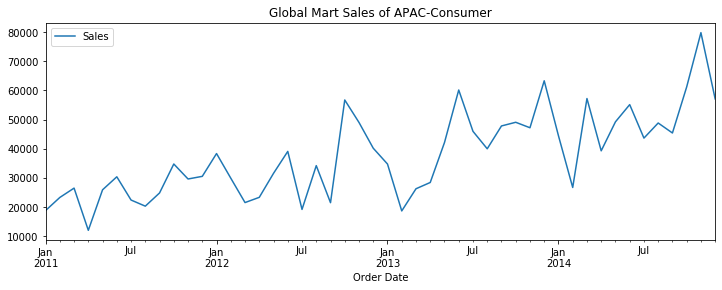

In [31]:
sales.plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Global Mart Sales of APAC-Consumer')
plt.show(block=False)

Here we observe a linear trend; the seasonality is not as very obvious. Lets decompose this time series to get a better idea.

### Outlier Detection
Before decompising the data, let's check for outliers first.

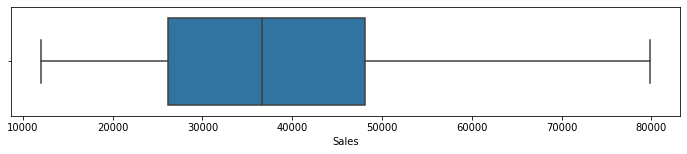

In [32]:
# Boxplot and Interquartile Range
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=sales['Sales'],whis=1.5)

> No outliers can be observed from the boxplot above.

# Time Series Decomposition

In [33]:
# Converting the data to timestamp to avoid errors
sales = sales.to_timestamp()

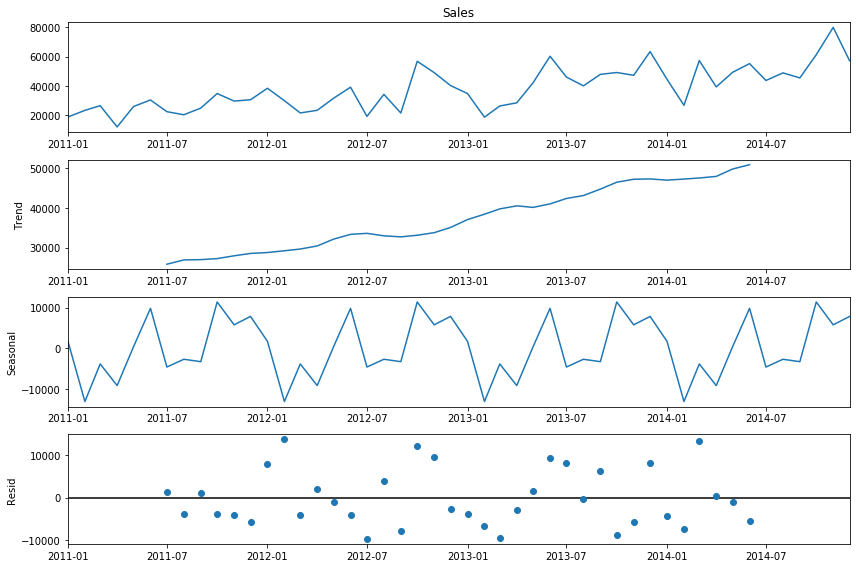

In [34]:
# Additive Seasonal Decomposition
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(sales.Sales, model='additive') 
fig = decomposition.plot()
plt.show()

> We can observe that there is some seasonality but we cannot be sure yet.

# Model Building and Evaluation

## Train-Test Split

In [35]:
train_len = 42
train_sales = sales[0:train_len]       # Using 42 Months for Train Data
test_sales = sales[train_len:]        # Using 6 Months for Test Data

# Forecasting Methods
**Looking at the flowchart for choosing the Right Time Series Method, we can say that the best smoothing method to Forecast Sales would be 'Holt-Winters Method' and among the ARIMA Models, SARIMA would be the best model for forecasting. Lets Check this.**

![title](img/Flowchart.png)

# Smoothing Techniques

We will be applying the following methods to check for best Smoothing Technique:
1. Simple exponential smoothing
2. Holt’s exponential smoothing
3. Holt-Winters’ exponential smoothing - Additive
4. Holt-Winters’ exponential smoothing - Multiplicative

## Simple Exponential Smoothing

In [36]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(train_sales['Sales'])
model_fit = model.fit(smoothing_level=0.2, optimized=False) # alpha = 0.2 
print(model_fit.params)
y_hat_ses = test_sales.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test_sales))

{'smoothing_level': 0.2, 'smoothing_slope': None, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 18821.989799999996, 'initial_slope': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

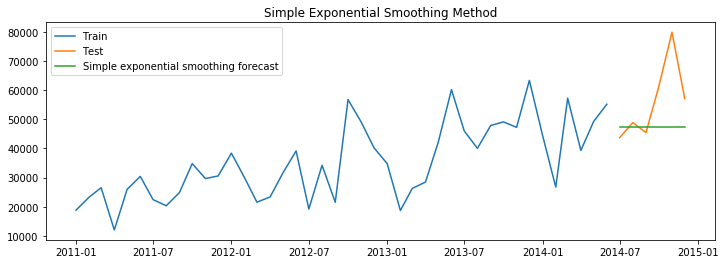

In [37]:
plt.figure(figsize=(12,4))
plt.plot(train_sales['Sales'], label='Train')
plt.plot(test_sales['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

### Calculate MAPE

In [38]:
mape = np.round(np.mean(np.abs(test_sales['Sales']-y_hat_ses['ses_forecast'])/test_sales['Sales'])*100,2)

results = pd.DataFrame({'Method':['Simple exponential smoothing forecast'],'MAPE': [mape] })
results

,Method,MAPE
0,Simple exponential smoothing forecast,15.99


## Holt’s exponential smoothing

In [39]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(np.asarray(train_sales['Sales']),seasonal_periods=12, trend='additive', seasonal=None)
#model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.04, optimized=False)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test_sales.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test_sales))

{'smoothing_level': 5.627237358067814e-07, 'smoothing_slope': 5.585707788149618e-07, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 19662.850091634136, 'initial_slope': 728.0262935036827, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


### Plot Train, Test and Forecast

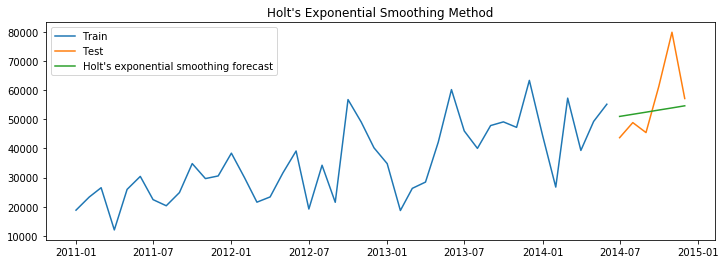

In [40]:
plt.figure(figsize=(12,4))
plt.plot(train_sales['Sales'], label='Train')
plt.plot(test_sales['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

### Calculate MAPE

In [41]:
mape = np.round(np.mean(np.abs(test_sales['Sales']-y_hat_holt['holt_forecast'])/test_sales['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Simple exponential smoothing forecast,15.99
0,Holt's exponential smoothing method,14.67


## Holt-Winters’ exponential smoothing - Additive

In [42]:
y_hat_hwa = test_sales.copy()
model = ExponentialSmoothing(np.asarray(train_sales['Sales']), seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(len(test_sales))

{'smoothing_level': 1.5184305341224914e-05, 'smoothing_slope': 1.5181664162983083e-05, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 30726.376810705675, 'initial_slope': 681.4626134515486, 'initial_seasons': array([ -9896.48784843, -19066.37419577, -11837.57010739, -20058.86777711,
        -9125.10164866,  -1098.98956305, -14099.00571122, -13080.28158206,
       -13028.56626988,    996.31662701,  -4531.27391113,  -2727.09902587]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


### Plot Train, Test and Forecast

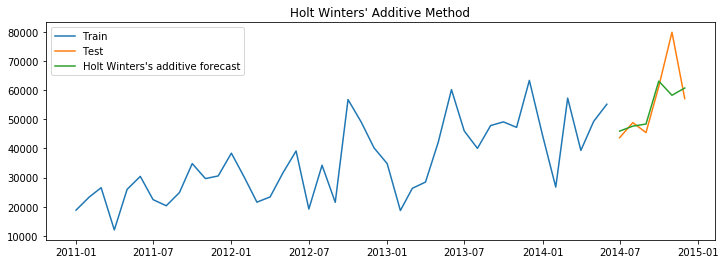

In [43]:
plt.figure(figsize=(12,4))
plt.plot( train_sales['Sales'], label='Train')
plt.plot(test_sales['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

### Calculate MAPE

In [44]:
mape = np.round(np.mean(np.abs(test_sales['Sales']-y_hat_hwa['hw_forecast'])/test_sales['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Simple exponential smoothing forecast,15.99
0,Holt's exponential smoothing method,14.67
0,Holt Winters' additive method,8.42


## Holt-Winters’ exponential smoothing - Multiplicative

In [45]:
model = ExponentialSmoothing(np.asarray(train_sales['Sales']), seasonal_periods=12, trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm = test_sales.copy()
y_hat_hwm['hw_forecast'] = model_fit.forecast(len(test_sales))

{'smoothing_level': 0.05263157508923701, 'smoothing_slope': 0.05263157431919611, 'smoothing_seasonal': 0.1578946902981123, 'damping_slope': nan, 'initial_level': 34110.965270043744, 'initial_slope': 730.4181594897913, 'initial_seasons': array([0.63077589, 0.37866617, 0.61733525, 0.45673281, 0.64532906,
       0.79505355, 0.5577297 , 0.57994453, 0.58277784, 0.83287475,
       0.74144394, 0.80759051]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


### Plot train, test and forecast

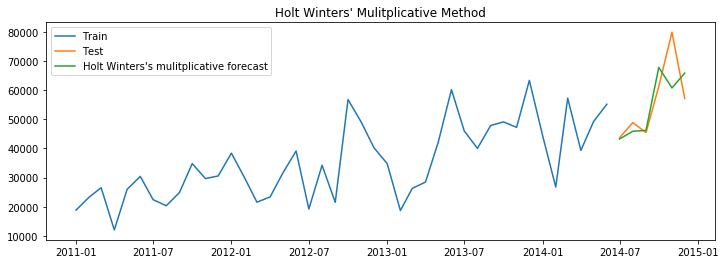

In [46]:
plt.figure(figsize=(12,4))
plt.plot( train_sales['Sales'], label='Train')
plt.plot(test_sales['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

### Calculate MAPE

In [47]:
mape = np.round(np.mean(np.abs(test_sales['Sales']-y_hat_hwm['hw_forecast'])/test_sales['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Simple exponential smoothing forecast,15.99
0,Holt's exponential smoothing method,14.67
0,Holt Winters' additive method,8.42
0,Holt Winters' multiplicative method,9.78


**As we can see, the plot for Holt Winters' Additive Method shows that this method is able to predict the sales closer to the actual values better. Also, the MAPE value is the least for this method among all the other methods done as seen in the results dataframe above. Therefore, we can conclude that Holt Winters' Method is the best Smoothing Techique for the Forecast.**

# Regression Techniques

## Stationary Test

In [48]:
# KPSS test
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(sales['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.577076
Critical Values @ 0.05: 0.46
p-value: 0.024720


The Null Hypothesis for KPSS Test is that the series is Stationary _(which means p-value must be greater than 0.05)_ and Alternative Hypothesis is that the series is not stationary _(where p ≤ 0.05)_.

So here, the p-value is 0.024 which means that the series is not Stationary. So we need to use the **box-cox transformation and differencing** to make the time-series stationary.

## Box-Cox Transformation

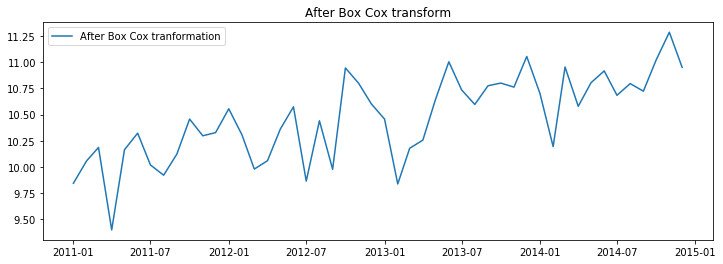

In [50]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(sales['Sales'], lmbda=0), index = sales.index) # lmbda=0 implies log transformation

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

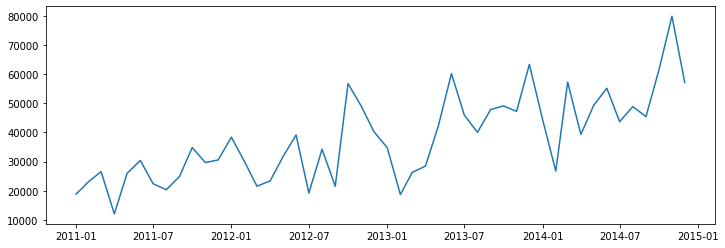

In [51]:
plt.figure(figsize=(12,4))
plt.plot( sales['Sales'], label='sales')

## Differencing to Remove Trend

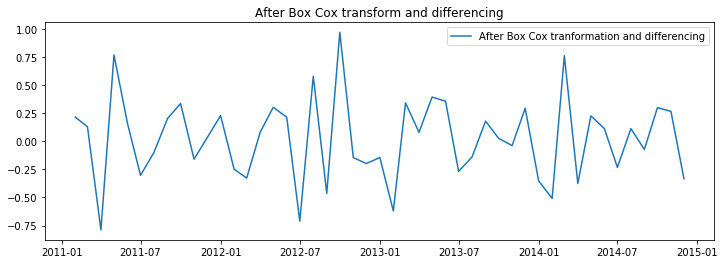

In [52]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), sales.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [53]:
data_boxcox_diff.dropna(inplace=True)

## Train-Test Split

#### Differencing and boxcox was done on the entire data, hence need to split it again.

In [54]:
train_data_boxcox = data_boxcox[:train_len] 
test_data_boxcox = data_boxcox[train_len:]

train_data_boxcox_diff = data_boxcox_diff[:train_len] 
test_data_boxcox_diff = data_boxcox_diff[train_len:]

In [55]:
test_data_boxcox_diff

Order Date
2014-08-01    0.112012
2014-09-01   -0.072673
2014-10-01    0.298459
2014-11-01    0.265449
2014-12-01   -0.335151
Freq: MS, dtype: float64

We will be applying the following methods to check for best Auto Regressive Model:
1. AR model
2. MA model
3. ARMA model
4. ARIMA model
5. SARIMA model

## AR Model

In [58]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.020458
ar.L1.y   -0.410077
dtype: float64


In [60]:
# In order to make the forecast, we need to transform the forecasts made to the original form
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])
# In order to get back the original time series we need to do a cumulative sum to remove the differencing and 
# exponentiate the forecasts in order to remove the effect of the boxcox transformation

### Plot Train, Test and Forecast

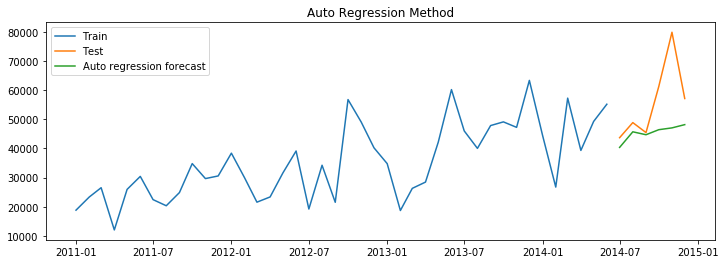

In [62]:
plt.figure(figsize=(12,4))
plt.plot(train_sales['Sales'], label='Train')
plt.plot(test_sales['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test_sales.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

### Calculate MAPE

In [63]:
mape = np.round(np.mean(np.abs(test_sales['Sales']-y_hat_ar['ar_forecast'][test_sales.index.min():])/test_sales['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Simple exponential smoothing forecast,15.99
0,Holt's exponential smoothing method,14.67
0,Holt Winters' additive method,8.42
0,Holt Winters' multiplicative method,9.78
0,Autoregressive (AR) method,16.11


## MA Model

In [64]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.020855
ma.L1.y   -1.000000
dtype: float64


In [65]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

### Plot Train, Test and Forecast

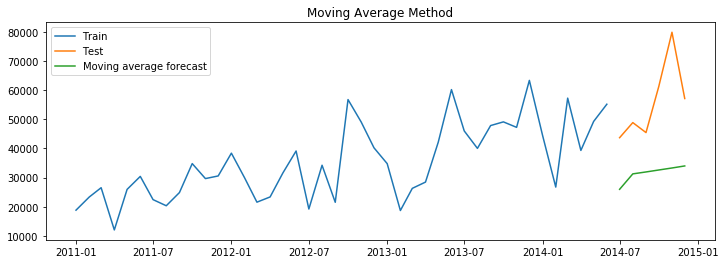

In [68]:
plt.figure(figsize=(12,4))
plt.plot(train_sales['Sales'], label='Train')
plt.plot(test_sales['Sales'], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test_sales.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

### Calculate MAPE

In [69]:
mape = np.round(np.mean(np.abs(test_sales['Sales']-y_hat_ma['ma_forecast'][test_sales.index.min():])/test_sales['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Simple exponential smoothing forecast,15.99
0,Holt's exponential smoothing method,14.67
0,Holt Winters' additive method,8.42
0,Holt Winters' multiplicative method,9.78
0,Autoregressive (AR) method,16.11
0,Moving Average (MA) method,41.97


## ARMA Model

In [70]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.020847
ar.L1.y    0.069472
ma.L1.y   -1.000000
dtype: float64


In [71]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

### Plot Train, Test and Forecast

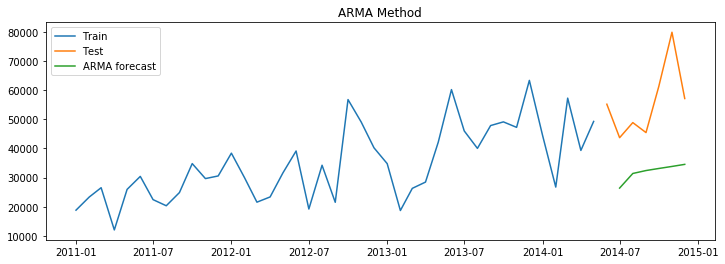

In [72]:
plt.figure(figsize=(12,4))
plt.plot( sales['Sales'][:train_len-1], label='Train')
plt.plot(sales['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test_sales.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

### Calculate MAPE

In [73]:
mape = np.round(np.mean(np.abs(test_sales['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test_sales['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Simple exponential smoothing forecast,15.99
0,Holt's exponential smoothing method,14.67
0,Holt Winters' additive method,8.42
0,Holt Winters' multiplicative method,9.78
0,Autoregressive (AR) method,16.11
0,Moving Average (MA) method,41.97
0,Autoregressive moving average (ARMA) method,41.17


## ARIMA Model

In [74]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

const        0.02147
ar.L1.D.y    0.07458
ma.L1.D.y   -1.00000
dtype: float64


In [75]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

### Plot Train, Test and Forecast

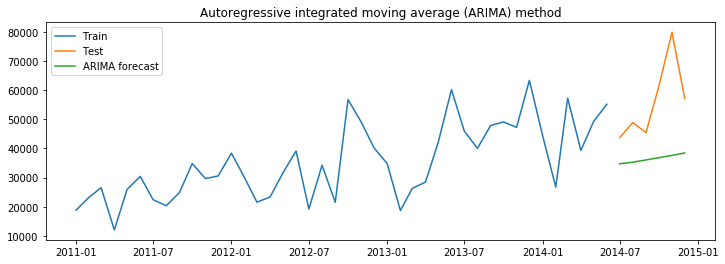

In [76]:
plt.figure(figsize=(12,4))
plt.plot(train_sales['Sales'], label='Train')
plt.plot(test_sales['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test_sales.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

### Caclulate MAPE

In [77]:
mape = np.round(np.mean(np.abs(test_sales['Sales']-y_hat_ar['ar_forecast'][test_sales.index.min():])/test_sales['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Simple exponential smoothing forecast,15.99
0,Holt's exponential smoothing method,14.67
0,Holt Winters' additive method,8.42
0,Holt Winters' multiplicative method,9.78
0,Autoregressive (AR) method,16.11
0,Moving Average (MA) method,41.97
0,Autoregressive moving average (ARMA) method,41.17
0,Autoregressive integrated moving average (ARIM...,16.11


## SARIMA Model

In [78]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.039455
ma.L1      -0.998683
ar.S.L12   -0.485659
sigma2      0.081975
dtype: float64


In [79]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

### Plot Train, Test and Forecast

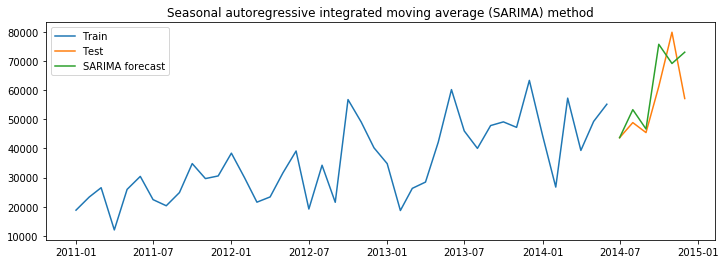

In [80]:
plt.figure(figsize=(12,4))
plt.plot(train_sales['Sales'], label='Train')
plt.plot(test_sales['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test_sales.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

### Calculate MAPE

In [81]:
mape = np.round(np.mean(np.abs(test_sales['Sales']-y_hat_sarima['sarima_forecast'][test_sales.index.min():])/test_sales['Sales'])*100,2)


tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Simple exponential smoothing forecast,15.99
0,Holt's exponential smoothing method,14.67
0,Holt Winters' additive method,8.42
0,Holt Winters' multiplicative method,9.78
0,Autoregressive (AR) method,16.11
0,Moving Average (MA) method,41.97
0,Autoregressive moving average (ARMA) method,41.17
0,Autoregressive integrated moving average (ARIM...,16.11
0,Seasonal autoregressive integrated moving aver...,12.78


**As we can see, the plot for SARIMA shows that this Model is able to predict the sales closer to the actual values better. Also, the MAPE value is the least for this Model among all the other methods as seen in the results dataframe above. Therefore, we can conclude that SARIMA Model is the best AR Model for the Forecast.**

# Conclusion

**We can conclude that the hypothesis we had taken from the flowchart for choosing the Right Time Series Method and the Forecasting Methods performed have matched as the Best Smoothing Technique and AR Model are Holt Winter's Additive Method and SARIMA Model as predicted.**